# Parkinson's Disease Prediction using Decision Trees

### Dataset Description

The Parkinson's Disease Classification Dataset on Kaggle is utilized for this assignment. It comprises several attributes related to voice measurements, aiming to predict the presence of Parkinson's disease in individuals. The dataset features include:

- Various voice measure features such as average vocal fundamental frequency, maximum vocal fundamental frequency, minimum vocal fundamental frequency, and measures of vocal fold operation among others.
- **Target Variable**: Status (0 for healthy, 1 for Parkinson's disease).

### Assignment Objectives

1. **Data Cleaning and Preprocessing**
   - Conduct thorough data cleaning and preprocessing to prepare the dataset for model training.
   - Dive into extensive data exploration to understand the dataset's nuances and inform the modeling strategy.
2. **Model Training and Evaluation**
   - Train a Decision Tree Classifier to predict the presence of Parkinson's disease.
   - Evaluate the model using appropriate metrics and techniques.

1. **Data Cleaning**
   - Identify and address missing values.
   - Develop a strategy for detecting and managing outliers in the voice measurement features.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import opendatasets as od

In [4]:
od.download(r"https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection")

Skipping, found downloaded files in ".\parkinson-disease-detection" (use force=True to force download)


In [5]:
df=pd.read_csv(r"C:\Users\assis\Downloads\MASAI DBMS\Google colab file\COLAB_File\parkinson-disease-detection\Parkinsson disease.csv")

In [6]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
df.columns[df.isna().sum()>0]

Index([], dtype='object')

<Axes: >

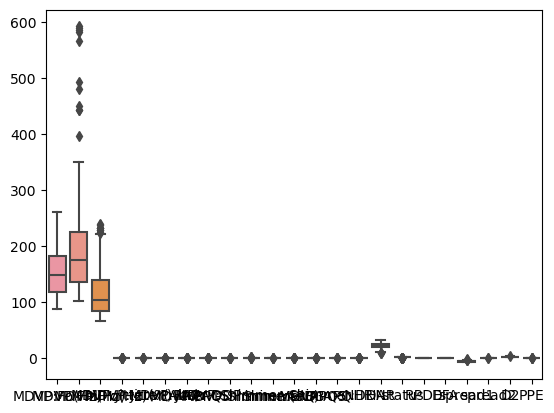

In [9]:
sns.boxplot(df)


2. **Data Preprocessing**
   - How will you approach scaling or normalizing the dataset, given the nature of voice measurement features?
   - Describe any feature engineering steps you plan to undertake.



### Split the dataset

In [10]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(df,test_size=0.4,random_state=42)
train_df,val_df=train_test_split(df,test_size=0.4,random_state=42)
print("train_df.shape-",train_df.shape)
print("val_df.shape",val_df.shape)
print("test_df.shape",test_df.shape)

train_df.shape- (117, 24)
val_df.shape (78, 24)
test_df.shape (78, 24)


In [11]:
inputs=list(train_df.columns)[:]
inputs.remove('status')

In [21]:
target='status'


In [22]:
train_input=train_df[inputs]
train_target=train_df[target]
val_input=val_df[inputs]
val_target=val_df[target]
test_input=test_df[inputs]
test_target=test_df[target]


In [23]:
numeric=train_input.select_dtypes(include=np.number).columns.tolist()
numeric

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [24]:
categorical=train_input.select_dtypes(object).columns.tolist()
categorical

['name']

### Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_input[numeric])

StandardScaler()

In [26]:
train_input[numeric]=scaler.transform(train_input[numeric])
val_input[numeric]=scaler.transform(val_input[numeric])
test_input[numeric]=scaler.transform(test_input[numeric])

C:\Users\assis\AppData\Local\Temp\ipykernel_37120\3023736864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[numeric]=scaler.transform(train_input[numeric])
C:\Users\assis\AppData\Local\Temp\ipykernel_37120\3023736864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input[numeric]=scaler.transform(val_input[numeric])
C:\Users\assis\AppData\Local\Temp\ipykernel_37120\3023736864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [27]:
train_input[numeric]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
22,0.387265,0.005896,-0.891708,-0.365925,-0.413801,-0.365847,-0.352029,-0.364851,0.639216,0.389782,...,0.895279,0.594536,-0.321142,0.138177,1.153618,-0.851037,1.191722,0.408323,1.302125,0.792434
126,-0.352523,0.051476,-0.843108,-0.170789,-0.126132,-0.131130,-0.095070,-0.130130,-0.121700,-0.213367,...,-0.132526,-0.096272,-0.193592,-0.764251,1.193975,0.247197,0.111228,-1.744409,-1.372562,0.045096
147,0.774483,0.273602,1.062555,1.593087,1.024545,1.629244,1.485232,1.628167,1.467933,1.499391,...,1.988259,1.185156,0.864279,-1.565918,-0.218230,0.824958,1.240280,1.555241,1.852911,1.318242
33,1.240089,0.214485,1.911488,-0.867156,-1.017906,-0.768671,-0.801708,-0.769799,-1.017728,-0.954641,...,-0.929113,-1.037553,-0.620910,2.287175,-1.283223,0.320298,-1.814429,-0.621780,-2.048114,-1.602910
11,-1.501040,-0.871783,-0.720111,-0.178441,0.449206,-0.172364,-0.066162,-0.171365,-0.140723,-0.199554,...,-0.155803,-0.151623,-0.355636,-0.083538,0.806658,1.267666,0.629514,1.651440,0.632401,0.690549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.068052,-0.328666,0.654182,-0.890113,-0.989139,-0.847967,-0.849888,-0.848039,-0.964073,-0.899391,...,-0.821005,-0.988077,-0.580957,1.669149,-1.617479,-0.886836,-1.176053,-0.547942,-0.619029,-1.074274
14,0.012589,-0.333557,-0.968479,-0.649063,-0.701470,-0.679859,-0.666805,-0.678871,-0.591419,-0.618535,...,-0.656515,-0.485895,-0.487652,0.654391,-0.249678,-1.336256,-0.393327,-0.313243,-0.629542,-0.413774
92,-0.100993,-0.314448,0.610261,-0.333402,-0.413801,-0.270691,-0.323121,-0.270751,0.560686,0.417407,...,0.277148,0.738326,-0.163814,-0.637616,-0.447592,0.176859,-0.256599,-1.736116,-0.095528,-0.242758
179,-0.104197,-0.416649,0.437857,-0.461580,-0.413801,-0.416596,-0.403421,-0.416659,-0.775795,-0.742848,...,-0.647721,-0.800068,-0.504775,0.393760,-0.991765,1.001225,-0.041416,0.144065,1.127143,-0.177635


In [28]:
train_input[numeric].describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,117.000000,1.170000e+02,1.170000e+02,...,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02
mean,-2.234680e-16,-1.745992e-16,2.144533e-16,-1.518254e-17,2.808769e-16,-8.350395e-17,7.591269e-18,0.000000,-1.897817e-17,-7.591269e-17,...,1.157668e-16,-1.062778e-16,-3.795634e-17,-9.564998e-16,-7.278129e-16,-4.112570e-15,-5.693451e-16,-4.915346e-16,-4.298556e-16,-4.023372e-16
std,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301,1.004301e+00,1.004301e+00,...,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00
min,-1.589735e+00,-1.025714e+00,-1.214568e+00,-8.901134e-01,-1.075440e+00,-8.479673e-01,-8.498883e-01,-0.848039,-1.017728e+00,-9.546408e-01,...,-9.291132e-01,-1.050849e+00,-6.226469e-01,-2.812488e+00,-2.372299e+00,-2.250213e+00,-2.054982e+00,-2.585701e+00,-2.344330e+00,-1.723974e+00
25%,-8.709094e-01,-6.637042e-01,-7.378550e-01,-5.744524e-01,-7.014701e-01,-5.402982e-01,-5.543848e-01,-0.539307,-6.821441e-01,-6.783896e-01,...,-6.239272e-01,-7.032806e-01,-5.065118e-01,-5.755613e-01,-7.789008e-01,-7.869230e-01,-6.919967e-01,-5.736314e-01,-7.411120e-01,-7.396725e-01
50%,-9.627378e-02,-3.144484e-01,-2.587433e-01,-3.008795e-01,-4.138010e-01,-3.277845e-01,-3.231212e-01,-0.327846,-3.646079e-01,-3.514923e-01,...,-3.715021e-01,-3.210786e-01,-3.551392e-01,9.105723e-02,1.867888e-02,9.945172e-02,-1.058023e-01,-9.138332e-02,-9.552751e-02,-2.251129e-01
75%,6.798769e-01,3.549358e-01,5.805216e-01,1.448721e-01,4.492064e-01,1.131021e-01,1.233461e-01,0.111993,3.753346e-01,3.299274e-01,...,2.771477e-01,4.337395e-01,6.169861e-03,7.610415e-01,9.297038e-01,7.321145e-01,4.760268e-01,5.002466e-01,6.324012e-01,4.570708e-01
max,2.486664e+00,4.469131e+00,2.911304e+00,4.732479e+00,5.051913e+00,4.816950e+00,5.143694e+00,4.818055,4.325271e+00,4.648655e+00,...,5.825845e+00,3.766257e+00,5.795800e+00,2.363534e+00,1.796481e+00,1.849846e+00,2.886468e+00,2.719421e+00,3.143990e+00,3.314227e+00


### Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder
numeric
categorical=list(df.select_dtypes(object).columns)
categorical

['name']

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(df[categorical])


C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [31]:
encoder_cols=list(encoder.get_feature_names_out(categorical))

In [32]:
encoder_cols

['name_phon_R01_S01_1',
 'name_phon_R01_S01_2',
 'name_phon_R01_S01_3',
 'name_phon_R01_S01_4',
 'name_phon_R01_S01_5',
 'name_phon_R01_S01_6',
 'name_phon_R01_S02_1',
 'name_phon_R01_S02_2',
 'name_phon_R01_S02_3',
 'name_phon_R01_S02_4',
 'name_phon_R01_S02_5',
 'name_phon_R01_S02_6',
 'name_phon_R01_S04_1',
 'name_phon_R01_S04_2',
 'name_phon_R01_S04_3',
 'name_phon_R01_S04_4',
 'name_phon_R01_S04_5',
 'name_phon_R01_S04_6',
 'name_phon_R01_S05_1',
 'name_phon_R01_S05_2',
 'name_phon_R01_S05_3',
 'name_phon_R01_S05_4',
 'name_phon_R01_S05_5',
 'name_phon_R01_S05_6',
 'name_phon_R01_S06_1',
 'name_phon_R01_S06_2',
 'name_phon_R01_S06_3',
 'name_phon_R01_S06_4',
 'name_phon_R01_S06_5',
 'name_phon_R01_S06_6',
 'name_phon_R01_S07_1',
 'name_phon_R01_S07_2',
 'name_phon_R01_S07_3',
 'name_phon_R01_S07_4',
 'name_phon_R01_S07_5',
 'name_phon_R01_S07_6',
 'name_phon_R01_S08_1',
 'name_phon_R01_S08_2',
 'name_phon_R01_S08_3',
 'name_phon_R01_S08_4',
 'name_phon_R01_S08_5',
 'name_phon_R01_

In [33]:
train_input[encoder_cols]=encoder.transform(train_input[categorical])
val_input[encoder_cols]=encoder.transform(val_input[categorical])
test_input[encoder_cols]=encoder.transform(test_input[categorical])

C:\Users\assis\AppData\Local\Temp\ipykernel_37120\3411475924.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoder_cols]=encoder.transform(train_input[categorical])
C:\Users\assis\AppData\Local\Temp\ipykernel_37120\3411475924.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[encoder_cols]=encoder.transform(train_input[categorical])
C:\Users\assis\AppData\Local\Temp\ipykernel_37120\3411475924.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

In [34]:
test_input

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,name_phon_R01_S49_3,name_phon_R01_S49_4,name_phon_R01_S49_5,name_phon_R01_S49_6,name_phon_R01_S50_1,name_phon_R01_S50_2,name_phon_R01_S50_3,name_phon_R01_S50_4,name_phon_R01_S50_5,name_phon_R01_S50_6
138,phon_R01_S33_5,-0.995967,-0.749940,-0.297224,-0.308532,-0.126132,-0.308753,-0.213913,-0.307757,1.269411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,phon_R01_S04_5,-0.202430,1.776434,-0.803914,-0.170789,-0.126132,-0.394393,-0.207489,-0.395513,-0.484599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,phon_R01_S37_3,-0.856106,-0.741544,-0.497729,0.026260,0.161537,0.065524,-0.181793,0.064414,0.022679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,phon_R01_S22_6,0.168346,-0.269923,0.669930,-0.557235,-0.701470,-0.499064,-0.554385,-0.498072,0.166083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,phon_R01_S18_3,-0.218698,-0.345925,-1.206658,0.894806,1.024545,0.988532,0.354610,0.988498,1.143080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,phon_R01_S33_4,-0.972942,-0.708399,-0.378509,-0.251139,-0.126132,-0.248488,-0.143249,-0.247491,1.091864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,phon_R01_S21_7,0.354355,0.150988,-0.916316,0.208004,-0.126132,0.163852,0.309642,0.163801,1.755715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,phon_R01_S34_6,1.764039,0.807561,-0.688139,-0.538104,-0.701470,-0.527611,-0.541537,-0.528734,-0.246081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,phon_R01_S08_1,0.634300,0.002492,1.221063,-0.425231,-0.701470,-0.324613,-0.371301,-0.323616,-0.446065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fill The Data

In [35]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(train_input[numeric+encoder_cols],train_target)



LogisticRegression()

In [36]:
train_pred=log_model.predict(train_input[numeric+encoder_cols])
val_pred=log_model.predict(val_input[numeric+encoder_cols])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,train_pred)

0.9230769230769231

In [38]:
accuracy_score(val_target,val_pred)

0.8589743589743589

In [39]:
train_target.value_counts()

status
1    89
0    28
Name: count, dtype: int64

In [40]:
from sklearn.metrics import f1_score
pos_label='Yes'
f1_score(train_target,train_pred)

0.9513513513513513

In [41]:
f1_score(val_target,val_pred)

0.9075630252100839

4. **Model Training**
   - Train a Decision Tree Classifier, modifying parameters to prevent overfitting.
   - Explain the choice of criterion (e.g., Gini impurity, entropy) for the decision tree and its implications.



It is the Gini-Index of which column is less then that column is consider as root_node so lower the gini-index better split  

Homogenus Data

we use the weighted average for the gini-index 

#### Dession Tree Classifer

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(train_input[numeric + encoder_cols], train_target)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

Classs weight Balanced -- this is on dession tree because-
- Dummy wt. to your target classes to balance the data

In [43]:
model.fit(train_input[numeric+encoder_cols],train_target)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

[Text(0.5, 0.8333333333333334, 'PPE <= -0.421\ngini = 0.5\nsamples = 117\nvalue = [58.5, 58.5]'),
 Text(0.25, 0.5, 'MDVP:Fo(Hz) <= 1.011\ngini = 0.321\nsamples = 45\nvalue = [52.232, 13.146]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'NHR <= -0.535\ngini = 0.213\nsamples = 72\nvalue = [6.268, 45.354]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

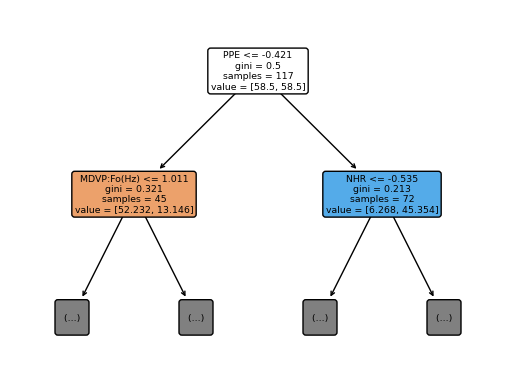

In [44]:
from sklearn.tree import plot_tree,export_text
plot_tree(model, feature_names=train_input[numeric + encoder_cols].columns.tolist(), max_depth=1, filled=True, rounded=True)

In [49]:
tree=export_text(model,feature_names=list(train_input[encoder_cols+numeric].columns))

In [50]:
print(tree[:500])

|--- name_phon_R01_S05_4 <= -0.42
|   |--- name_phon_R01_S01_1 <= 1.01
|   |   |--- name_phon_R01_S01_1 <= -0.35
|   |   |   |--- name_phon_R01_S02_3 <= -0.94
|   |   |   |   |--- class: 1
|   |   |   |--- name_phon_R01_S02_3 >  -0.94
|   |   |   |   |--- name_phon_R01_S01_2 <= -0.86
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- name_phon_R01_S01_2 >  -0.86
|   |   |   |   |   |--- name_phon_R01_S01_6 <= -0.40
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- name_phon_R01_


In [51]:
train_pred=model.predict(train_input[numeric+encoder_cols])
val=model.predict(val_input[numeric+encoder_cols])

In [52]:
f1_score(train_target,train_pred)

1.0

In [53]:
f1_score(val_target,val_pred)

0.9075630252100839

In [54]:
train_target.value_counts()

status
1    89
0    28
Name: count, dtype: int64

In [55]:
from sklearn.metrics import mean_squared_error as mse
mse(train_pred,train_target,squared=False)

0.0

In [56]:
from sklearn.metrics import mean_squared_error as mse
mse(val_pred,val_target,squared=False)

0.3755338080994054

#### Decission Tree


In [57]:
from sklearn.tree import DecisionTreeRegressor
d_model=DecisionTreeRegressor()
d_model.fit(train_input[numeric],train_target)


DecisionTreeRegressor()

In [58]:
train_d_pred=d_model.predict(train_input[numeric])
val_d_pred=d_model.predict(val_input[numeric])

#### Evaluation_Decission_Tree

In [59]:
mse(train_d_pred,train_target,squared=False)

0.0

In [60]:
mse(val_d_pred,val_target,squared=False)

0.35805743701971643

3. **Data Exploration**
   - What insights can you uncover about the distributions of the voice measurement features?
   - How do these features correlate with the presence of Parkinson's disease?



In [61]:
d_model.feature_importances_

array([0.08281064, 0.        , 0.03756019, 0.        , 0.        ,
       0.        , 0.03130016, 0.09658335, 0.05589314, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04695024, 0.12194868, 0.        , 0.3741077 , 0.        ,
       0.0443833 , 0.10846259])

In [62]:
importance_df = pd.DataFrame({'feature': train_input[numeric].columns,'importance': d_model.feature_importances_}).sort_values('importance', ascending=False)

In [63]:
importance_df.head(10)

,feature,importance
18,spread1,0.374108
16,RPDE,0.121949
21,PPE,0.108463
7,Jitter:DDP,0.096583
0,MDVP:Fo(Hz),0.082811
8,MDVP:Shimmer,0.055893
15,HNR,0.046950
20,D2,0.044383
2,MDVP:Flo(Hz),0.037560
6,MDVP:PPQ,0.031300


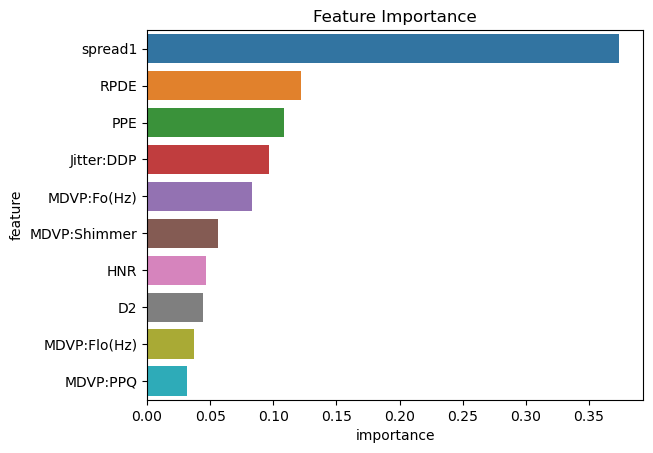

In [64]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

5. **Model Evaluation**
   - Evaluate your model using accuracy, precision, recall, and F1 score.
   - Interpret the findings from the confusion matrix and ROC-AUC curve. What do they indicate about your model's performance?

In [74]:
from sklearn.metrics import roc_curve, auc

In [71]:

train_auc = roc_auc_score(train_true_labels, train_pred)
val_auc = roc_auc_score(val_true_labels, val_pred)

In [72]:
fpr_train, tpr_train, _ = roc_curve(train_true_labels, train_pred)

In [73]:
fpr_val, tpr_val, _ = roc_curve(val_true_labels, val_pred)

### Hyper Parameter Training

#### Max_Depth

In [50]:
model=DecisionTreeClassifier(max_depth=10,random_state=42)

In [51]:
model.fit(train_input[numeric+encoder_cols],train_target)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [52]:
train_pred=model.predict(train_input[numeric+encoder_cols])
val_pred=model.predict(val_input[numeric+encoder_cols])

In [53]:
f1_score(train_pred,train_target)

1.0

In [54]:
f1_score(val_pred,val_target)

0.923076923076923

#### MAX LEAF NODE

In [55]:
model =DecisionTreeClassifier(max_depth=18, max_leaf_nodes=400,random_state=42)


In [56]:
model.fit(train_input[numeric+encoder_cols],train_target)

DecisionTreeClassifier(max_depth=18, max_leaf_nodes=400, random_state=42)

In [57]:
train_pred=model.predict(train_input[numeric+encoder_cols])
val_pred=model.predict(val_input[numeric+encoder_cols])

In [58]:
train_target

22     1
126    1
147    1
33     0
11     1
      ..
106    1
14     1
92     1
179    1
102    1
Name: status, Length: 117, dtype: int64

In [59]:
train_input[numeric]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
22,0.387265,0.005896,-0.891708,-0.365925,-0.413801,-0.365847,-0.352029,-0.364851,0.639216,0.389782,...,0.895279,0.594536,-0.321142,0.138177,1.153618,-0.851037,1.191722,0.408323,1.302125,0.792434
126,-0.352523,0.051476,-0.843108,-0.170789,-0.126132,-0.131130,-0.095070,-0.130130,-0.121700,-0.213367,...,-0.132526,-0.096272,-0.193592,-0.764251,1.193975,0.247197,0.111228,-1.744409,-1.372562,0.045096
147,0.774483,0.273602,1.062555,1.593087,1.024545,1.629244,1.485232,1.628167,1.467933,1.499391,...,1.988259,1.185156,0.864279,-1.565918,-0.218230,0.824958,1.240280,1.555241,1.852911,1.318242
33,1.240089,0.214485,1.911488,-0.867156,-1.017906,-0.768671,-0.801708,-0.769799,-1.017728,-0.954641,...,-0.929113,-1.037553,-0.620910,2.287175,-1.283223,0.320298,-1.814429,-0.621780,-2.048114,-1.602910
11,-1.501040,-0.871783,-0.720111,-0.178441,0.449206,-0.172364,-0.066162,-0.171365,-0.140723,-0.199554,...,-0.155803,-0.151623,-0.355636,-0.083538,0.806658,1.267666,0.629514,1.651440,0.632401,0.690549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.068052,-0.328666,0.654182,-0.890113,-0.989139,-0.847967,-0.849888,-0.848039,-0.964073,-0.899391,...,-0.821005,-0.988077,-0.580957,1.669149,-1.617479,-0.886836,-1.176053,-0.547942,-0.619029,-1.074274
14,0.012589,-0.333557,-0.968479,-0.649063,-0.701470,-0.679859,-0.666805,-0.678871,-0.591419,-0.618535,...,-0.656515,-0.485895,-0.487652,0.654391,-0.249678,-1.336256,-0.393327,-0.313243,-0.629542,-0.413774
92,-0.100993,-0.314448,0.610261,-0.333402,-0.413801,-0.270691,-0.323121,-0.270751,0.560686,0.417407,...,0.277148,0.738326,-0.163814,-0.637616,-0.447592,0.176859,-0.256599,-1.736116,-0.095528,-0.242758
179,-0.104197,-0.416649,0.437857,-0.461580,-0.413801,-0.416596,-0.403421,-0.416659,-0.775795,-0.742848,...,-0.647721,-0.800068,-0.504775,0.393760,-0.991765,1.001225,-0.041416,0.144065,1.127143,-0.177635


In [60]:
f1_score(train_pred,train_target)

1.0

In [61]:
f1_score(val_pred,val_target)

0.9137931034482759

## Min Sample Split

In [62]:
model=DecisionTreeClassifier(max_depth=80,max_leaf_nodes=400,min_samples_leaf=8,random_state=42)

In [63]:
model.fit(train_input[numeric+encoder_cols],train_target)

DecisionTreeClassifier(max_depth=80, max_leaf_nodes=400, min_samples_leaf=8,
                       random_state=42)

In [64]:
train_pred=model.predict(train_input[numeric+encoder_cols])
val_pred=model.predict(val_input[numeric+encoder_cols])

In [65]:
f1_score(train_pred,train_target)

0.9485714285714285

In [66]:
f1_score(val_pred,val_target)

0.9482758620689655

## Grid Search CV

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [68]:
param_grid={'max_leaf_node':[50,100,200],'max_depth':[None,10,20],'min_sample_split':[2,5,10]}

In [69]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,scoring=make_scorer(f1_score,pos_label=pos_label),cv=3)

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier

# Assuming 'model' is your DecisionTreeClassifier instance
param_grid = {'max_leaf_nodes': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(f1_score, pos_label=pos_label), cv=3)

grid_search.fit(train_input[numeric + encoder_cols], train_target)


C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*ar

C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*ar

C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*ar

C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*ar

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=80, max_leaf_nodes=400,
                                              min_samples_leaf=8,
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_leaf_nodes': [50, 100, 200],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score, pos_label=Yes))

In [71]:
print("Best Hyperparamete :",grid_search.best_params_)

Best Hyperparamete : {'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_split': 2}


In [72]:
val_accuracy = grid_search.best_estimator_.score(val_input[numeric + encoder_cols], val_target)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.9230769230769231



    As we accuracy of the model is quite high which does not mean that our model is working better.
    Beacuse ther is the class imbalance in the dataset . Model achieve the High accuracy
    For the good underStanding we consider the other model also . Given Below

    The F1 scores you provided for both the training and validation sets are relatively low, with values of approximately 0.33 for both. The F1 score is the harmonic mean of precision and recall and is particularly useful when dealing with imbalanced datasets. A low F1 score may indicate that your model struggles to balance precision and recall, especially for the minority class ("Yes" in this case)
